## Observations and Insights

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

study_df = pd.merge(mouse_metadata, study_results, how="outer")

# Display the data table for preview

print(study_df.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [6]:
# Checking the number of mice.

mouseCount = study_df["Mouse ID"].nunique()

print(mouseCount)


249


In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = study_df.loc[study_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False), :]

dupeIDs = duplicates["Mouse ID"].unique()


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 

for x in dupeIDs:
    dupeData = study_df.loc[study_df['Mouse ID'] == x]
    print(dupeData)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

for x in dupeIDs:
    clean_df = study_df[study_df["Mouse ID"] != x]

In [28]:
# Checking the number of mice in the clean DataFrame.

newMouseCount = clean_df["Mouse ID"].nunique()

print(newMouseCount)


248


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumorMean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumorMedian = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumorVar = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumorSTD = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumorSEM = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

tumorSummary = pd.DataFrame({"Mean Tumor Volume (mm3)": tumorMean,
                             "Median Tumor Volume (mm3)": tumorMedian,
                             "Variance of Tumor Volume (mm3)": tumorVar,
                             "Standard Deviation of Tumor Volume (mm3)": tumorSTD,
                             "Standard Mean Error (mm3)": tumorSEM})

tumorSummary


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Mean Error (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggData = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})

aggData


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

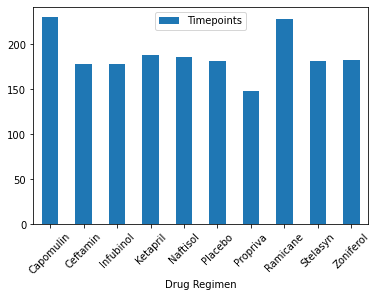

In [219]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

dataCount = clean_df.groupby("Drug Regimen").count()

barData = pd.DataFrame(dataCount).reset_index()

barData = barData.rename(columns={"Timepoint": "Timepoints"})

barData.plot.bar(x = "Drug Regimen", y = "Timepoints", rot=45)

Text(0.5, 0, 'Drug Regimen')

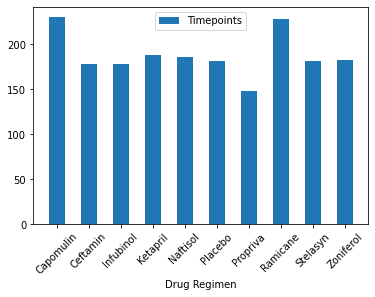

In [174]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(barData["Drug Regimen"], barData["Timepoints"], width = 0.5)
plt.xticks(rotation = 45)
plt.legend(["Timepoints"],loc="upper center")
plt.xlabel("Drug Regimen")

<AxesSubplot:title={'center':'Mice by Sex'}>

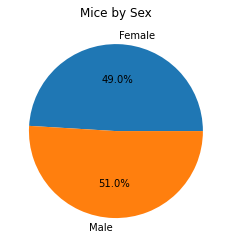

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sexCount = pd.DataFrame(clean_df.groupby("Sex")["Sex"].count())

sexCount.plot.pie(y="Sex", autopct="%1.1f%%", legend="", ylabel="", title = "Mice by Sex")


Text(0.5, 1.0, 'Mice by Sex')

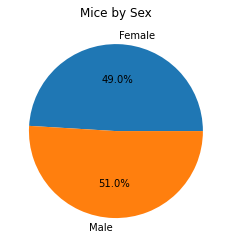

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

newSexCount = sexCount.rename(columns={"Sex": "Count"}).reset_index()

plt.pie(newSexCount["Count"], labels = newSexCount["Sex"], autopct="%1.1f%%")
plt.title("Mice by Sex")


## Quartiles, Outliers and Boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

maxTimepoints = clean_df.groupby("Mouse ID")["Timepoint"].max()

finalTimepoints = pd.DataFrame(maxTimepoints).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

finalData_df = clean_df.merge(finalTimepoints, how="inner")

finalData_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [244]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
fourDrugs_df = finalData_df.loc[finalData_df["Drug Regimen"].isin(treatments)]

tumorVol = fourDrugs_df[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
    
    # add subset 

capomulinData = tumorVol.loc[tumorVol["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"]

ramicaneData = tumorVol.loc[tumorVol["Drug Regimen"] == "Ramicane","Tumor Volume (mm3)"]

infubinolData = tumorVol.loc[tumorVol["Drug Regimen"] == "Infubinol","Tumor Volume (mm3)"]

ceftaminData = tumorVol.loc[tumorVol["Drug Regimen"] == "Ceftamin","Tumor Volume (mm3)"]

    # Determine outliers using upper and lower bounds
    
CA_quartiles = capomulinData.quantile([.25,.5,.75])
CA_lowerq = CA_quartiles[0.25]
CA_upperq = CA_quartiles[0.75]
CA_iqr = CA_upperq-CA_lowerq

CA_lower_bound = CA_lowerq - (1.5*CA_iqr)
CA_upper_bound = CA_upperq + (1.5*CA_iqr)

CA_outliers = [x for x in capomulinData if x > CA_upper_bound or x < CA_lower_bound]


R_quartiles = ramicaneData.quantile([.25,.5,.75])
R_lowerq = R_quartiles[0.25]
R_upperq = R_quartiles[0.75]
R_iqr = R_upperq-R_lowerq

R_lower_bound = R_lowerq - (1.5*R_iqr)
R_upper_bound = R_upperq + (1.5*R_iqr)

R_outliers = [x for x in ramicaneData if x > R_upper_bound or x < R_lower_bound]


I_quartiles = infubinolData.quantile([.25,.5,.75])
I_lowerq = I_quartiles[0.25]
I_upperq = I_quartiles[0.75]
I_iqr = I_upperq-I_lowerq

I_lower_bound = I_lowerq - (1.5*I_iqr)
I_upper_bound = I_upperq + (1.5*I_iqr)

I_outliers = [x for x in infubinolData if x > I_upper_bound or x < I_lower_bound]


CE_quartiles = ceftaminData.quantile([.25,.5,.75])
CE_lowerq = CE_quartiles[0.25]
CE_upperq = CE_quartiles[0.75]
CE_iqr = CE_upperq-CE_lowerq

CE_lower_bound = CE_lowerq - (1.5*CE_iqr)
CE_upper_bound = CE_upperq + (1.5*CE_iqr)

CE_outliers = [x for x in ceftaminData if x > CE_upper_bound or x < CE_lower_bound]


print(CA_outliers)
print(R_outliers)
print(I_outliers)
print(CE_outliers)


[]
[]
[36.3213458]
[]


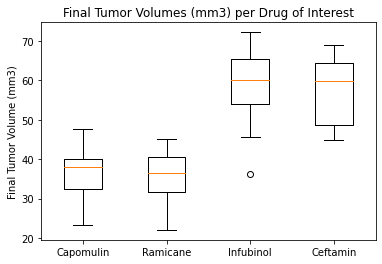

In [252]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes (mm3) per Drug of Interest')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([capomulinData, ramicaneData, infubinolData, ceftaminData])
plt.xticks([1,2,3,4],treatments)

plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
